# Finding parameters of the Drude model for plasmonic materials



## Import

In [2]:
import matplotlib.pyplot as plt
import yaml
import numpy as np
from scipy.constants import c
from refractiveindex import RefractiveIndexMaterial

## Parameters


In [2]:
layer_thickness = 10e-9 # thickness of layer


## Load refractive index of silver

In [4]:
# Load the YAML file
with open('Ag_Johnson.yml', 'r') as file:
    yaml_data = yaml.safe_load(file)

# Extract the "data" field from the "DATA" section
data_field = yaml_data['DATA'][0]['data']

# Split the data into lines and convert it into a numpy array
lines = data_field.strip().split('\n')
data_array = np.array([list(map(float, line.split())) for line in lines])

# Print the resulting numpy array
print(data_array[:,0])
plt.plot


[0.1879 0.1916 0.1953 0.1993 0.2033 0.2073 0.2119 0.2164 0.2214 0.2262
 0.2313 0.2371 0.2426 0.249  0.2551 0.2616 0.2689 0.2761 0.2844 0.2924
 0.3009 0.3107 0.3204 0.3315 0.3425 0.3542 0.3679 0.3815 0.3974 0.4133
 0.4305 0.4509 0.4714 0.4959 0.5209 0.5486 0.5821 0.6168 0.6595 0.7045
 0.756  0.8211 0.892  0.984  1.088  1.216  1.393  1.61   1.937 ]


<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

In [5]:
# Extract data
wavelengths = data_array[:,0]*1e-6
n = data_array[:,1]
k = data_array[:,2]

# Calculate the permittivity
eps_r = (n + 1j * k)**2
print(eps_r)



[-3.2404400e-01+2.59368j -3.0782400e-01+2.7104j  -3.2062500e-01+2.8112j
 -3.3112900e-01+2.91156j -3.5711600e-01+2.9808j  -3.2894400e-01+3.09632j
 -3.1562500e-01+3.18j    -2.9649600e-01+3.25984j -2.3846400e-01+3.355j
 -2.1873600e-01+3.38688j -2.0304900e-01+3.47392j -2.3028900e-01+3.49952j
 -2.0888400e-01+3.5828j  -2.1322100e-01+3.63918j -1.7154900e-01+3.70538j
 -1.0126900e-01+3.7449j   2.2016000e-02+3.78672j  2.1653900e-01+3.75342j
  3.9040400e-01+3.56448j  5.8417900e-01+3.22758j  8.6630400e-01+2.58352j
  8.9744400e-01+1.39216j  5.0243600e-01+0.63504j -6.5834100e-01+0.28186j
 -1.2845640e+00+0.31976j -2.0035610e+00+0.2838j  -2.7407490e+00+0.23198j
 -3.4719960e+00+0.1864j  -4.2824000e+00+0.207j   -5.1731250e+00+0.2275j
 -6.0598440e+00+0.19696j -7.0580490e+00+0.21256j -8.2286610e+00+0.2869j
 -9.5641490e+00+0.3093j  -1.1046476e+01+0.3324j  -1.2855796e+01+0.43032j
 -1.4881664e+01+0.3858j  -1.7235504e+01+0.49824j -2.0094789e+01+0.4483j
 -2.3404644e+01+0.38704j -2.7477664e+01+0.31452j -3.27969

Text(0, 0.5, '$\\epsilon\\prime\\prime$')

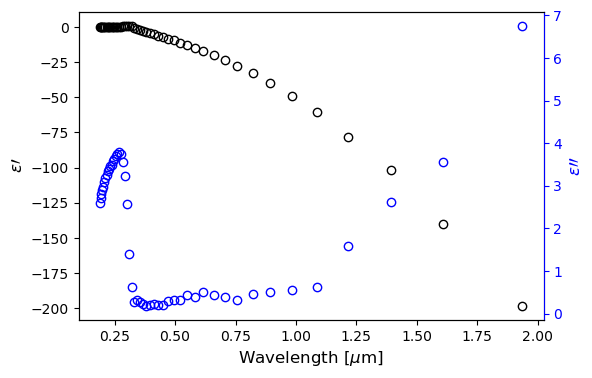

In [15]:
x = wavelengths / 1e-6
y1 = eps_r.real
y2 = eps_r.imag
# Create the plot
fig, ax1 = plt.subplots(figsize=(6, 4))  # Adjust size as per Nature guidelines

# Plot the data
ax1.plot(x, y1, marker='o', markerfacecolor='none', markeredgecolor='black', linestyle='none', label='$\epsilon\prime$')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.yaxis.label.set_color('blue')  # Change x-axis label color
ax2.tick_params(axis='y', colors='blue')  # Change x-axis tick colors
ax2.spines['right'].set_color('blue')  # Change x-axis spine color

# Plot data on the right axis
ax2.plot(x, y2, marker='o', markerfacecolor='none', markeredgecolor='blue', linestyle='none', label='$\epsilon\prime\prime$') 

# Add labels
ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=12)
ax1.set_ylabel('$\epsilon\prime$', fontsize=12)
ax2.set_ylabel('$\epsilon\prime\prime$', fontsize=12)

Text(0, 0.5, '$\\epsilon\\prime\\prime$')

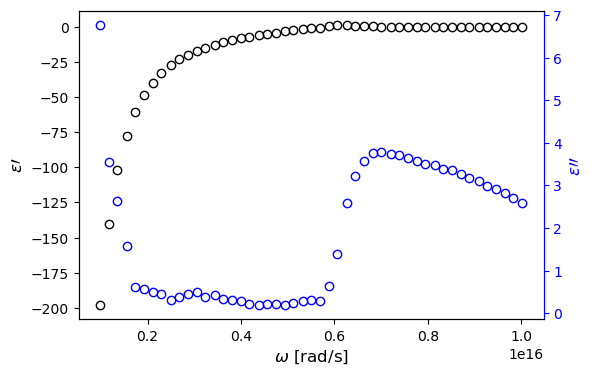

In [22]:
omega = 2 * np.pi * c / wavelengths
x = omega
y1 = eps_r.real
y2 = eps_r.imag
# Create the plot
fig, ax1 = plt.subplots(figsize=(6, 4))  # Adjust size as per Nature guidelines

# Plot the data
ax1.plot(x, y1, marker='o', markerfacecolor='none', markeredgecolor='black', linestyle='none', label='$\epsilon\prime$')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.yaxis.label.set_color('blue')  # Change x-axis label color
ax2.tick_params(axis='y', colors='blue')  # Change x-axis tick colors
ax2.spines['right'].set_color('blue')  # Change x-axis spine color

# Plot data on the right axis
ax2.plot(x, y2, marker='o', markerfacecolor='none', markeredgecolor='blue', linestyle='none', label='$\epsilon\prime\prime$') 

# Add labels
ax1.set_xlabel('$\omega$ [rad/s]', fontsize=12)
ax1.set_ylabel('$\epsilon\prime$', fontsize=12)
ax2.set_ylabel('$\epsilon\prime\prime$', fontsize=12)

In [61]:
# Drude material model
class DrudeMaterial:
    def __init__(self, eps_s, omega_p, tau):
        self.eps_s = eps_s
        self.omega_p = omega_p
        self.tau = tau

    def eps_r(self, omega):
        eps_r = self.eps_s*(1 - self.omega_p**2 / omega / (omega + 1j / self.tau))
        return eps_r       

In [84]:
# Define Drude model parameters
eps_s = 3
T_p = 0.8e-15
omega_p = 2 * np.pi / T_p
print(format(omega_p, '.4e'))
tau = 40*T_p

# Drude model
AgDrude = DrudeMaterial(eps_s, omega_p, tau)

# Data from model
eps_r_AgDrude = AgDrude.eps_r(omega)

7.8540e+15


Text(0, 0.5, '$\\epsilon\\prime\\prime$')

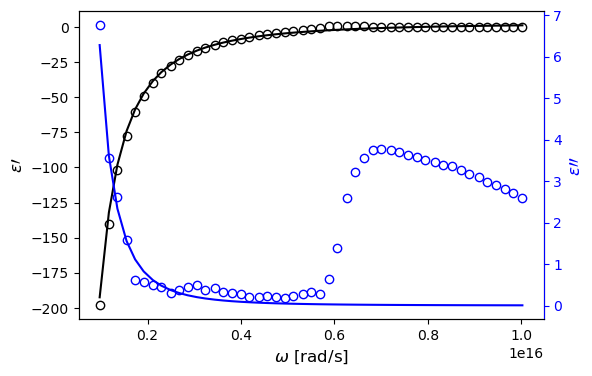

In [85]:
x = omega
y1 = eps_r.real
y3 = eps_r_AgDrude.real
y2 = eps_r.imag
y4 = eps_r_AgDrude.imag

# Create the plot
fig, ax1 = plt.subplots(figsize=(6, 4))  # Adjust size as per Nature guidelines

# Plot the data
ax1.plot(x, y1, marker='o', markerfacecolor='none', markeredgecolor='black', linestyle='none', label='$\epsilon\prime$')
ax1.plot(x, y3, color='black', linewidth='1.5', label='$\epsilon\prime$')

# Create a secondary y-axis
ax2 = ax1.twinx()
ax2.yaxis.label.set_color('blue')  # Change x-axis label color
ax2.tick_params(axis='y', colors='blue')  # Change x-axis tick colors
ax2.spines['right'].set_color('blue')  # Change x-axis spine color

# Plot data on the right axis
ax2.plot(x, y2, marker='o', markerfacecolor='none', markeredgecolor='blue', linestyle='none', label='$\epsilon\prime\prime$') 
ax2.plot(x, y4, color='blue', linewidth='1.5', label='$\epsilon\prime$') 

# Add labels
ax1.set_xlabel('$\omega$ [rad/s]', fontsize=12)
ax1.set_ylabel('$\epsilon\prime$', fontsize=12)
ax2.set_ylabel('$\epsilon\prime\prime$', fontsize=12)